## Importing the required libraries

In [1]:
#loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid')

## Loading dataset

In [2]:
#loading the dataset
df=pd.read_csv("E:\Python\Data_Sets\Zomato\Banglore data\Banglore data.csv")

In [3]:
df.head(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Summary of the dataset

In [547]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [548]:
print(df.shape)

(51717, 17)


In [549]:
print(df.dtypes)

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object


## Data Cleaning
#### 1) Dropping unnecessary columns
#### 2) Renaming columns
#### 3) Dropping duplicates 
#### 3) Cleaning columns individually

In [550]:
df.drop(['url','address','phone','location','dish_liked','reviews_list','menu_item'],axis=1,inplace=True)

In [551]:
print(df.columns.values)

['name' 'online_order' 'book_table' 'rate' 'votes' 'rest_type' 'cuisines'
 'approx_cost(for two people)' 'listed_in(type)' 'listed_in(city)']


In [552]:
df=df.rename(columns={"name":'Name','rate':'Ratings','votes':'Votes','rest_type':'Rest_Type','cuisines':'Cuisines','approx_cost(for two people)':'Cost','listed_in(type)':'Type','listed_in(city)':'City','online_order':'Takes online orders?','book_table':'Has table booking?'})

In [553]:
print(df.columns.values)

['Name' 'Takes online orders?' 'Has table booking?' 'Ratings' 'Votes'
 'Rest_Type' 'Cuisines' 'Cost' 'Type' 'City']


In [554]:
df.head(5)

,Name,Takes online orders?,Has table booking?,Ratings,Votes,Rest_Type,Cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [555]:
df=df.drop_duplicates()
print(df.shape)

(51593, 10)


In [556]:
print(len(df['Name'].unique()))
## there are 8792 unique restaurants in the dataset

8792


In [557]:
def name_clean(text):
    return re.sub(r"[^a-zA-Z0-9 ]", "", text)

df['Name'] = df['Name'].apply(lambda x: name_clean(x))
print(df['Name'])

0                                                    Jalsa
1                                           Spice Elephant
2                                          San Churro Cafe
3                                    Addhuri Udupi Bhojana
4                                            Grand Village
                               ...                        
51712        Best Brews  Four Points by Sheraton Bengaluru
51713                             Vinod Bar And Restaurant
51714    Plunge  Sheraton Grand Bengaluru Whitefield Ho...
51715    Chime  Sheraton Grand Bengaluru Whitefield Hotel 
51716                          The Nest  The Den Bengaluru
Name: Name, Length: 51593, dtype: object


In [558]:
## cleaning the Ratings Column
df['Ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [559]:
df["Ratings"]=df["Ratings"].replace("NEW", np.nan)
df['Ratings']=df['Ratings'].replace('NaN',np.nan)
df['Ratings']=df['Ratings'].replace('-',np.nan)
df['Ratings']=df['Ratings'].replace('nan',np.nan)

In [560]:
print(df['Ratings'])

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51712    3.6 /5
51713       NaN
51714       NaN
51715    4.3 /5
51716    3.4 /5
Name: Ratings, Length: 51593, dtype: object


In [561]:
def remove_5(value: str):
    if type(value)==str:
        value_new=value.split('/')[0]
        return value_new
    return value

In [562]:
df['Ratings']=df['Ratings'].apply(remove_5)

In [563]:
print(df['Ratings'].unique())

['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' nan '2.9' '3.5' '2.6' '3.8 ' '3.4' '4.5' '2.5' '2.7'
 '4.7' '2.4' '2.2' '2.3' '3.4 ' '3.6 ' '4.8' '3.9 ' '4.2 ' '4.0 ' '4.1 '
 '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 ' '3.2 ' '2.6 '
 '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 ' '3.0 ' '4.8 '
 '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']


In [564]:
df['Ratings']=df['Ratings'].astype(float)
print(df['Ratings'].dtypes)

float64


In [565]:
df['Ratings'].value_counts()

3.9    3967
3.8    3870
3.7    3814
3.6    3311
4.0    3180
4.1    2942
3.5    2781
3.4    2472
3.3    2305
4.2    2179
3.2    1867
4.3    1686
3.1    1561
4.4    1137
3.0    1022
2.9     801
4.5     653
2.8     600
2.7     307
4.6     299
2.6     260
4.7     167
2.5     101
2.4      70
4.8      66
4.9      55
2.3      51
2.2      26
2.1      24
2.0      11
1.8       5
Name: Ratings, dtype: int64

In [566]:
df['Cost'].value_counts()

300      7547
400      6548
500      4972
200      4837
600      3710
         ... 
60          1
5,000       1
3,700       1
469         1
160         1
Name: Cost, Length: 70, dtype: int64

In [567]:
def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
    
df['Cost'] = df['Cost'].apply(cost)
print(df['Cost'].head())
print(df['Cost'].dtypes)

0    800.0
1    800.0
2    800.0
3    300.0
4    600.0
Name: Cost, dtype: float64
float64


In [568]:
print(df['Votes'].value_counts)

<bound method IndexOpsMixin.value_counts of 0        775
1        787
2        918
3         88
4        166
        ... 
51712     27
51713      0
51714      0
51715    236
51716     13
Name: Votes, Length: 51593, dtype: int64>


## Exploratory Data Analysis

In [569]:
df.isnull().sum()

Name                        0
Takes online orders?        0
Has table booking?          0
Ratings                 10003
Votes                       0
Rest_Type                 227
Cuisines                   45
Cost                      344
Type                        0
City                        0
dtype: int64

In [570]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Ratings', 'Rest_Type', 'Cuisines', 'Cost']

<AxesSubplot:>

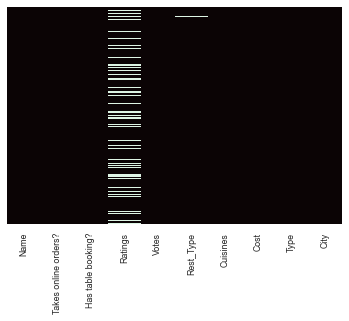

In [571]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='mako')

In [572]:
df['Ratings']=df['Ratings'].fillna(0)

In [573]:
df=df.dropna()
print(df.shape)

(51026, 10)


In [574]:
df.isnull().sum()

Name                    0
Takes online orders?    0
Has table booking?      0
Ratings                 0
Votes                   0
Rest_Type               0
Cuisines                0
Cost                    0
Type                    0
City                    0
dtype: int64

#### Percentage of restaurants in Banglore that accept online orders

Yes    30214
No     20812
Name: Takes online orders?, dtype: int64


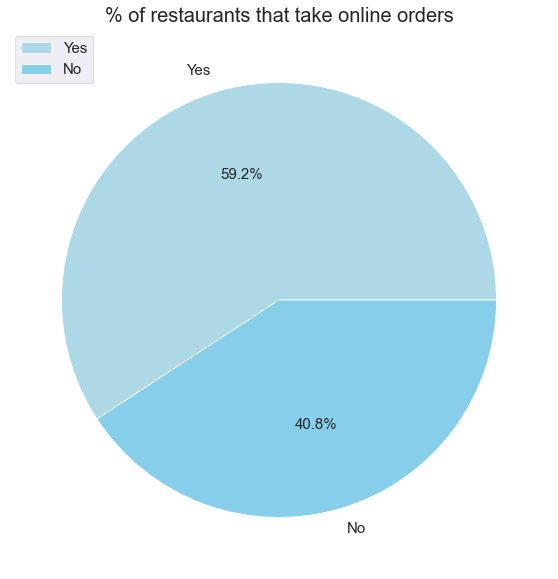

In [575]:
print(df['Takes online orders?'].value_counts())

plt.figure(figsize=(30,10))
df['Takes online orders?'].value_counts().plot(kind='pie',colors=['lightblue','skyblue'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that take online orders',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

### Percentage of restaurants in Banglore that provide table booking facility

No     44610
Yes     6416
Name: Has table booking?, dtype: int64


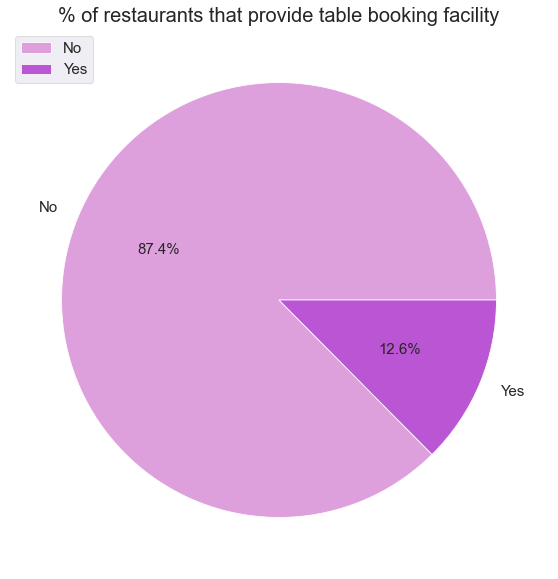

In [576]:
print(df['Has table booking?'].value_counts())

plt.figure(figsize=(30,10))
df['Has table booking?'].value_counts().plot(kind='pie',colors=['plum','mediumorchid'],autopct='%1.1f%%', textprops={'fontsize': 15})
plt.title('% of restaurants that provide table booking facility',size=20)
plt.xlabel('',size=15)
plt.ylabel('',size=15)
plt.legend(loc=2, prop={'size': 15})

### Count of unique ratings

In [577]:
ratings=df.groupby(['Ratings']).size().reset_index().rename(columns={0:"Rating_Count"})
print(ratings)

    Ratings  Rating_Count
0       0.0          9836
1       1.8             5
2       2.0            11
3       2.1            24
4       2.2            26
5       2.3            51
6       2.4            66
7       2.5           100
8       2.6           249
9       2.7           303
10      2.8           580
11      2.9           800
12      3.0           990
13      3.1          1550
14      3.2          1839
15      3.3          2272
16      3.4          2443
17      3.5          2761
18      3.6          3282
19      3.7          3801
20      3.8          3816
21      3.9          3953
22      4.0          3142
23      4.1          2922
24      4.2          2151
25      4.3          1677
26      4.4          1136
27      4.5           653
28      4.6           299
29      4.7           167
30      4.8            66
31      4.9            55


Text(0, 0.5, 'Ratings Count')

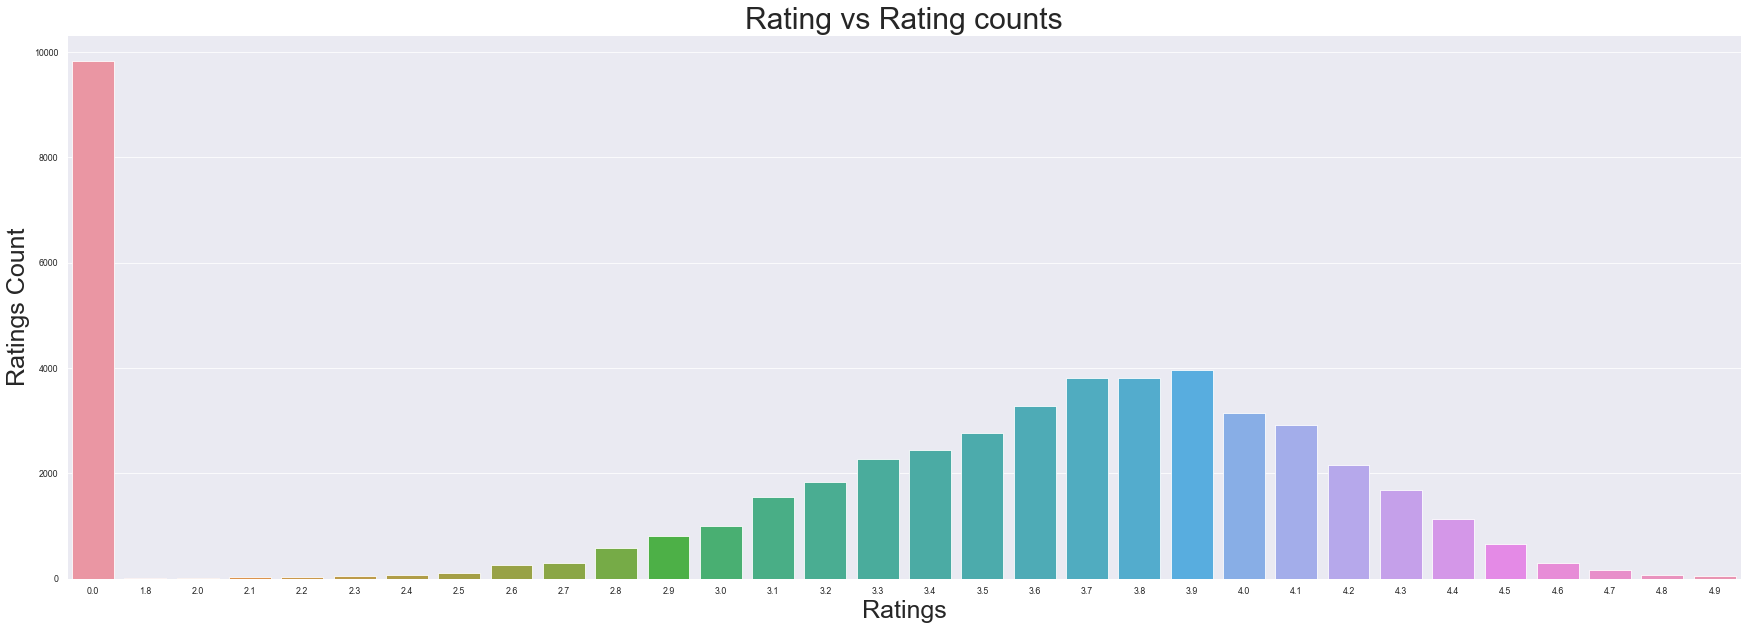

In [578]:
plt.figure(figsize=(30,10))
sns.barplot(x='Ratings',y='Rating_Count',data=ratings)
plt.title('Rating vs Rating counts',size=30)
plt.xlabel('Ratings',size=25)
plt.ylabel('Ratings Count',size=25)

#### How does the approximate cost for 2 people effect the user ratings?

C:\Users\admin\AppData\Local\Temp/ipykernel_12064/3645467860.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


[Text(0, -1000.0, '-1,000'),
 Text(0, 0.0, '0'),
 Text(0, 1000.0, '1,000'),
 Text(0, 2000.0, '2,000'),
 Text(0, 3000.0, '3,000'),
 Text(0, 4000.0, '4,000'),
 Text(0, 5000.0, '5,000'),
 Text(0, 6000.0, '6,000'),
 Text(0, 7000.0, '7,000')]

<Figure size 2160x720 with 0 Axes>

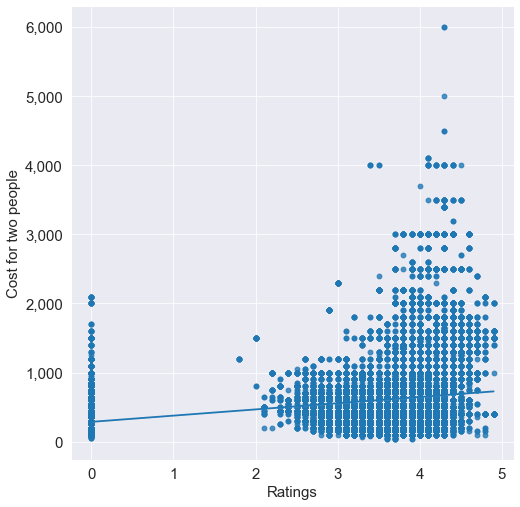

In [579]:
plt.figure(figsize=(30,10))
sns.lmplot(x='Ratings',y='Cost',data=df,height=7)
plt.xlabel('Ratings',size=15)
plt.ylabel('Cost for two people',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])


#### Which locality in Banglore has the most high and low rated restaurants?

In [580]:
a=df.groupby('City')['Ratings'].mean().reset_index().sort_values(by='Ratings')
print(a.tail(5))

              City   Ratings
27  Residency Road  3.174125
7    Church Street  3.183754
5     Brigade Road  3.193141
22    Malleshwaram  3.219231
21         MG Road  3.221067


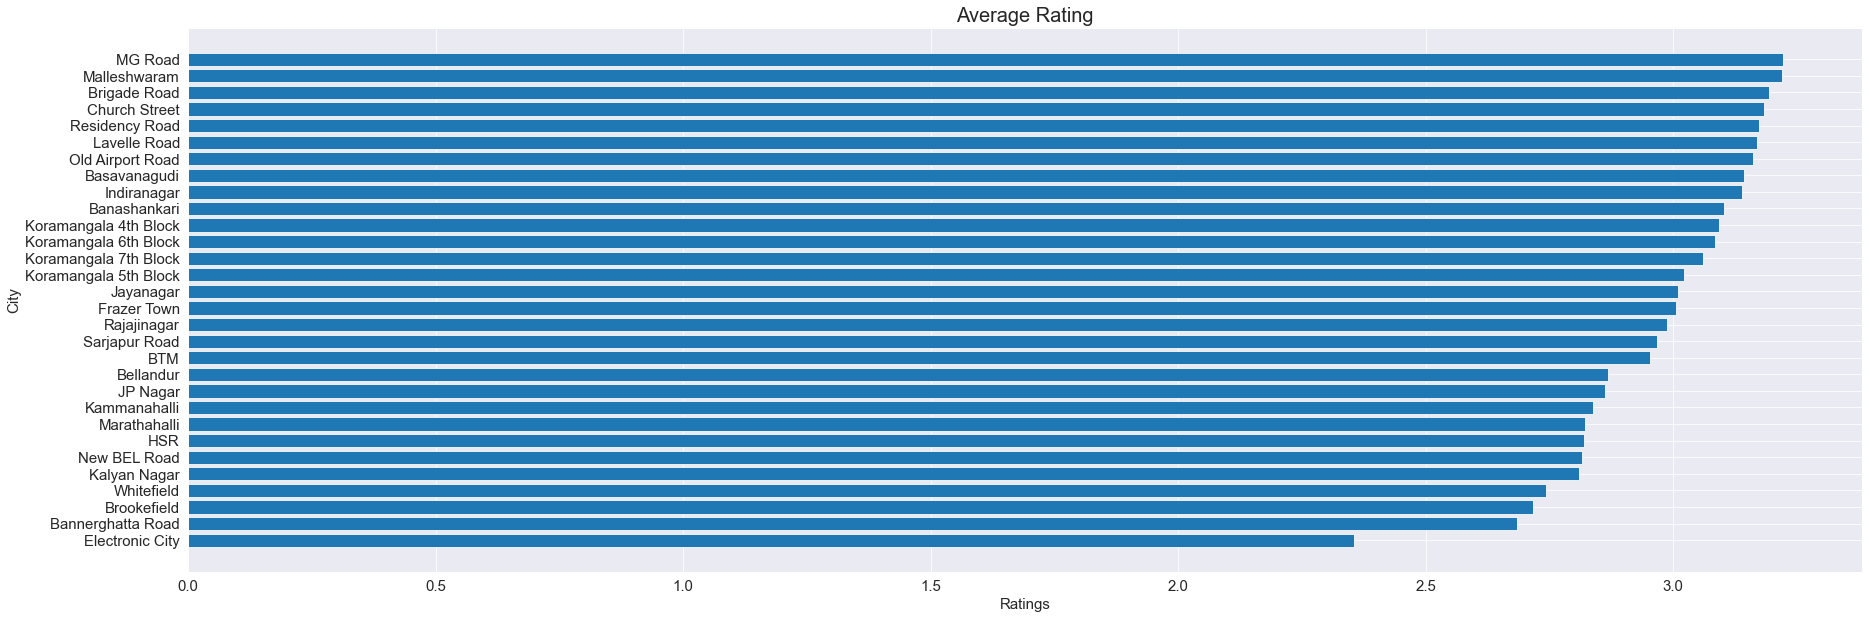

In [581]:
plt.figure(figsize=(30,10))
plt.barh(a.City,a.Ratings)
plt.xlabel('Ratings',size=15)
plt.ylabel('City',size=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Average Rating',size=20)
plt.show()

#### What kind of cuisines get highest customer rating?

In [582]:
df['Cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: Cuisines, Length: 2704, dtype: int64

In [583]:
b=df.groupby('Cuisines')['Ratings'].mean().reset_index().sort_values(by='Ratings')
print(b.tail(5))

                                               Cuisines  Ratings
2060         North Indian, European, Mediterranean, BBQ      4.8
225             Asian, Mediterranean, North Indian, BBQ      4.8
1461                 Healthy Food, Salad, Mediterranean      4.9
204                         Asian, Chinese, Thai, Momos      4.9
1148  Continental, North Indian, Italian, South Indi...      4.9


#### Ratings vs Votes vs Cost

In [604]:
max(df['Votes'].unique())

16832

<AxesSubplot:>

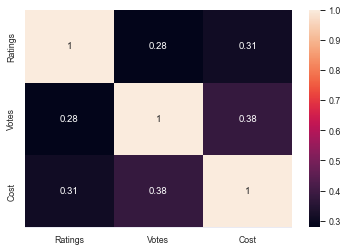

In [605]:
sns.heatmap(df.corr(),annot=True)

In [607]:
c=df.groupby('Votes')['Ratings'].mean().reset_index().sort_values(by='Votes',ascending=False)
print(c.head(5))

      Votes  Ratings
2325  16832      4.9
2324  16345      4.9
2323  14956      4.7
2322  14726      4.7
2321  14723      4.7


#### Most famous restaurant type in Bangalore

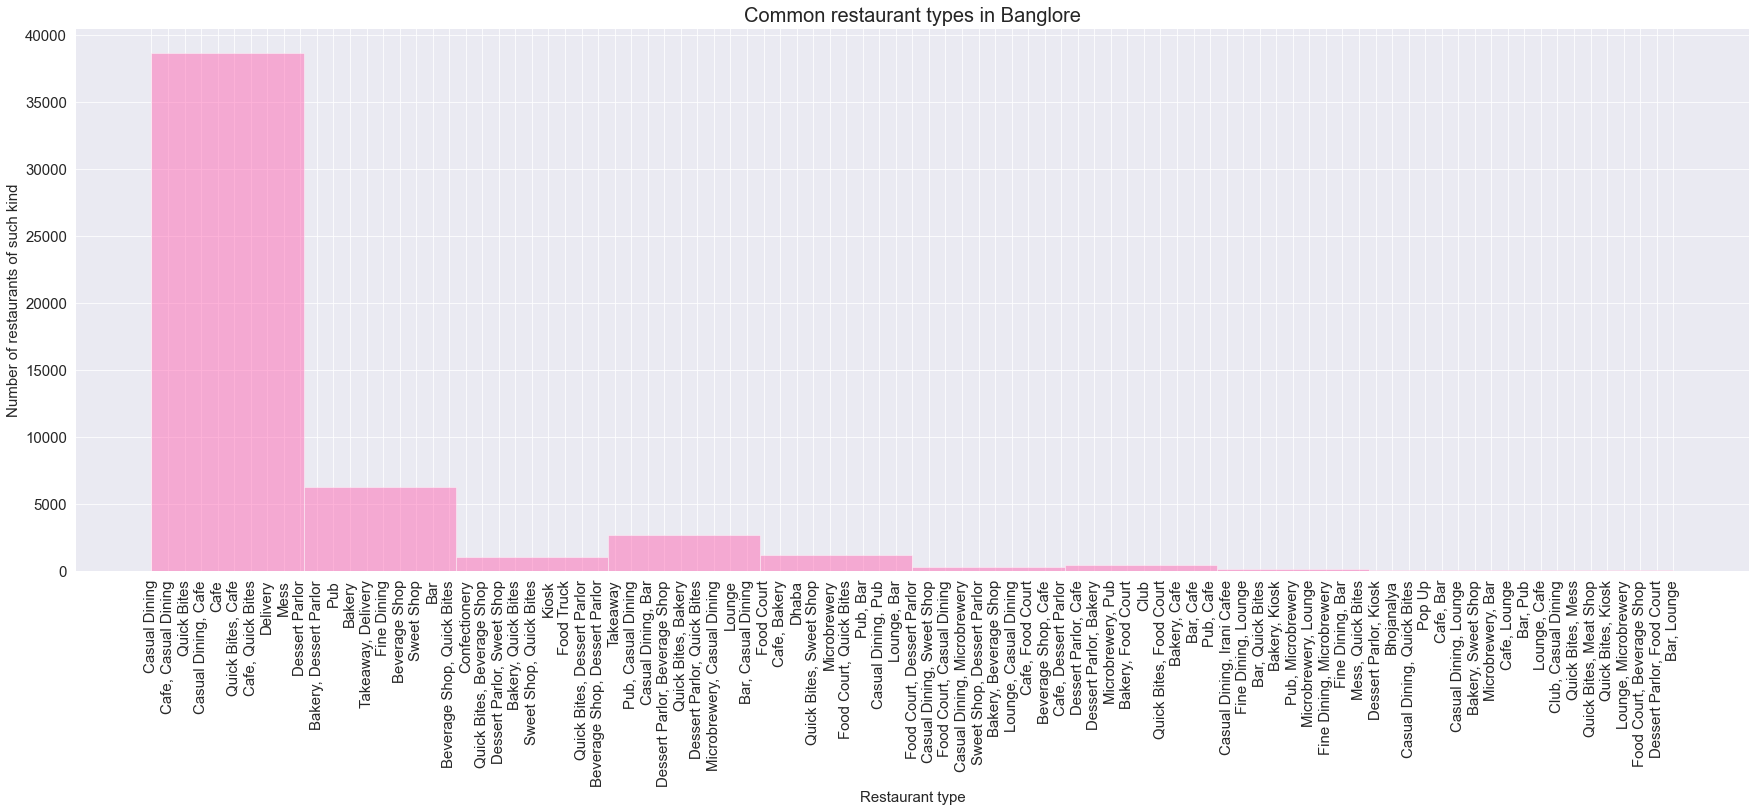

In [608]:
plt.figure(figsize=(30,10))
plt.hist(df['Rest_Type'],alpha=0.5,color='hotpink')
plt.xlabel('Restaurant type',size=15)
plt.ylabel('Number of restaurants of such kind',size=15)
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15)
plt.title('Common restaurant types in Banglore',size=20)
plt.show()

#### What is the average price for two for each service in Banglore?

In [587]:
df['Type'].value_counts()

Delivery              25569
Dine-out              17560
Desserts               3555
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

In [588]:
d=df.groupby('Type')['Cost'].mean().reset_index().sort_values(by='Cost')
print(d)

                 Type         Cost
3            Desserts   392.565401
2            Delivery   464.790762
4            Dine-out   592.407175
1               Cafes   627.803876
0              Buffet  1306.559264
6       Pubs and bars  1327.405248
5  Drinks & nightlife  1444.972325


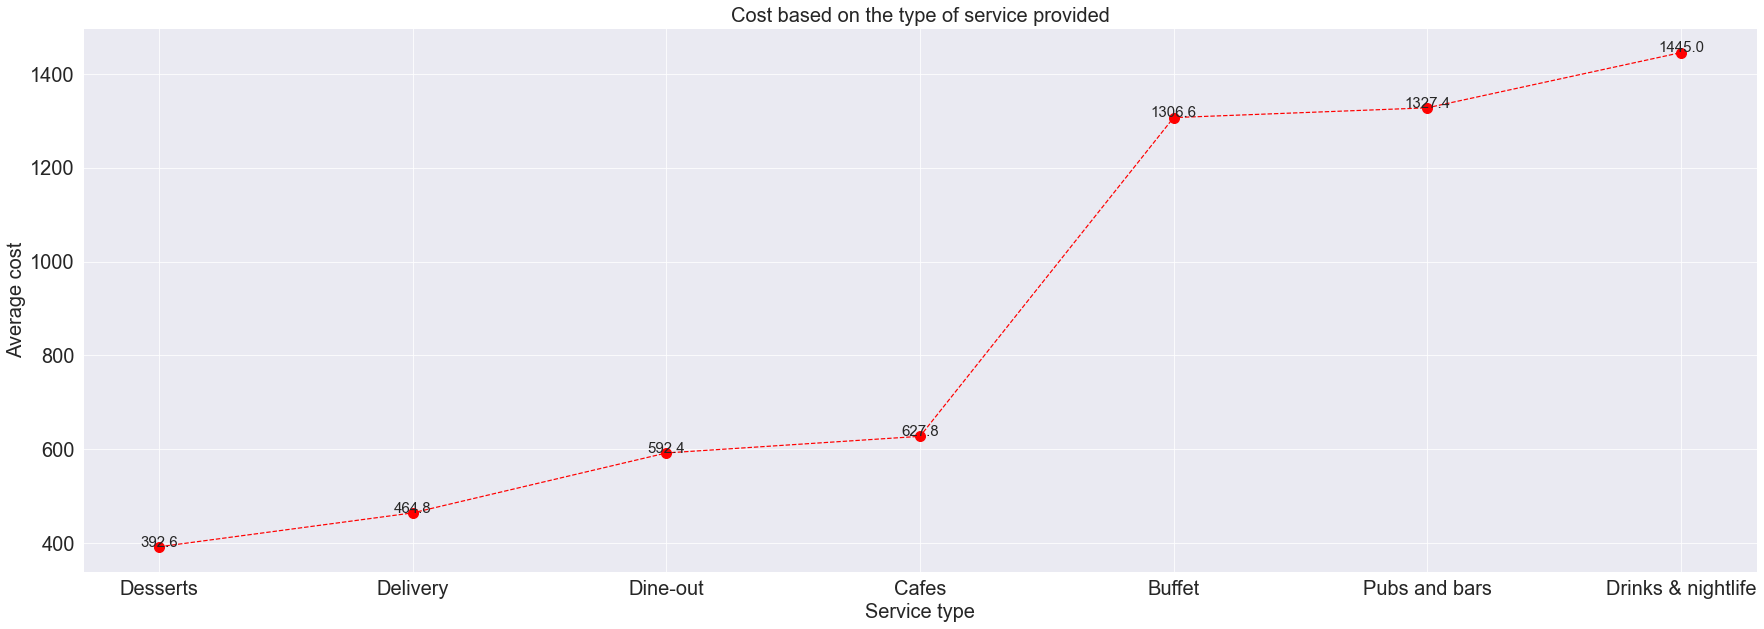

In [589]:
plt.figure(figsize=(30,10))
plt.plot(d['Type'],d['Cost'],'o--r',ms=10)
plt.xlabel('Service type',size=20)
plt.ylabel('Average cost',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Cost based on the type of service provided',size=20)
for i,e in enumerate(d.Cost):
    plt.text(i,e+1,round(e,1),fontsize=15,horizontalalignment='center')
plt.show()

#### Which city has the higheste earning restaurants and what is the max and min earnings in that city?

In [590]:
df['City'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [591]:
e=df.groupby('City')['Cost'].agg(['mean','max','min']).sort_values(by='mean',ascending=False).reset_index()
print(e)

                     City        mean     max    min
0           Church Street  774.789916  4000.0   40.0
1            Brigade Road  767.261905  4000.0   40.0
2                 MG Road  762.955056  4000.0   50.0
3            Lavelle Road  753.887022  4100.0   50.0
4          Residency Road  743.193125  4000.0   50.0
5             Indiranagar  653.942203  6000.0   40.0
6        Old Airport Road  610.746918  6000.0  100.0
7              Whitefield  580.843298  3000.0  100.0
8            Malleshwaram  575.384615  5000.0  100.0
9             Frazer Town  558.718166  3000.0   40.0
10              Bellandur  549.077307  2500.0  100.0
11          Sarjapur Road  543.160454  2500.0  100.0
12  Koramangala 4th Block  529.135036  3000.0   40.0
13  Koramangala 5th Block  523.307115  2500.0   40.0
14            Brookefield  522.080268  3000.0  100.0
15  Koramangala 6th Block  522.022428  2500.0   40.0
16  Koramangala 7th Block  521.200000  2500.0  100.0
17           Marathahalli  498.244322  4500.0 

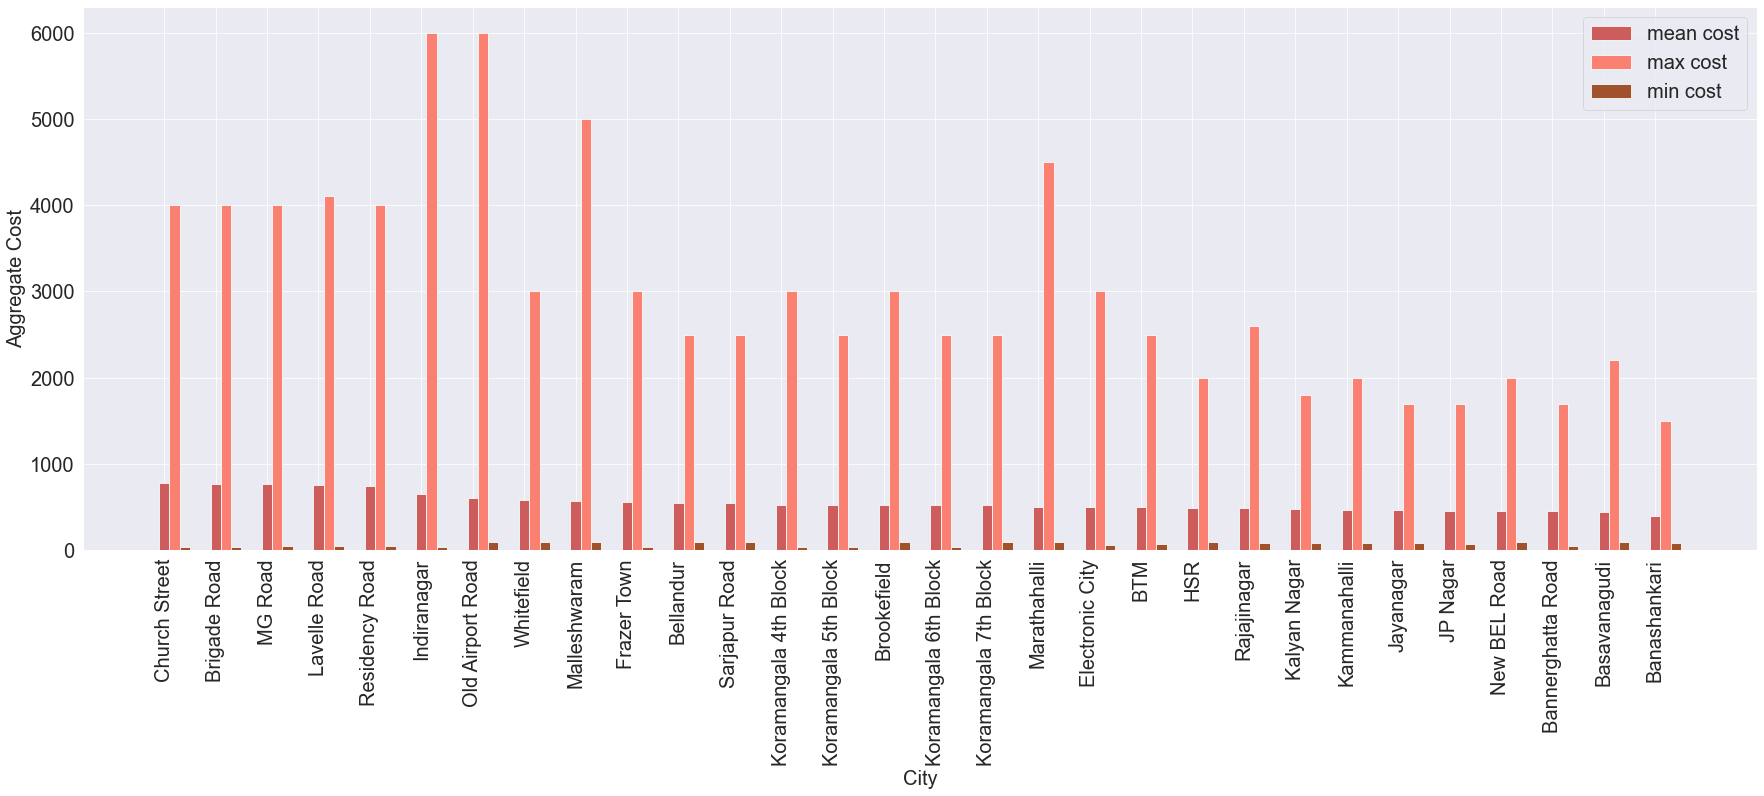

In [592]:
plt.figure(figsize=(30,10))
n=30
i= np.arange(n) 
width=0.2

e1=plt.bar(i, e['mean'], width, color = 'indianred')  
e2=plt.bar(i+width, e['max'], width, color='salmon')
e3=plt.bar(i+width*2, e['min'], width, color = 'sienna')
plt.xlabel('City',size=20)
plt.ylabel('Aggregate Cost',size=20)
plt.xticks(e.index,e.City,rotation=90,fontsize=20)
plt.yticks(fontsize=20)
plt.legend((e1,e2,e3), ('mean cost','max cost','min cost'),fontsize=20)

#### Restaurant type with highest rating

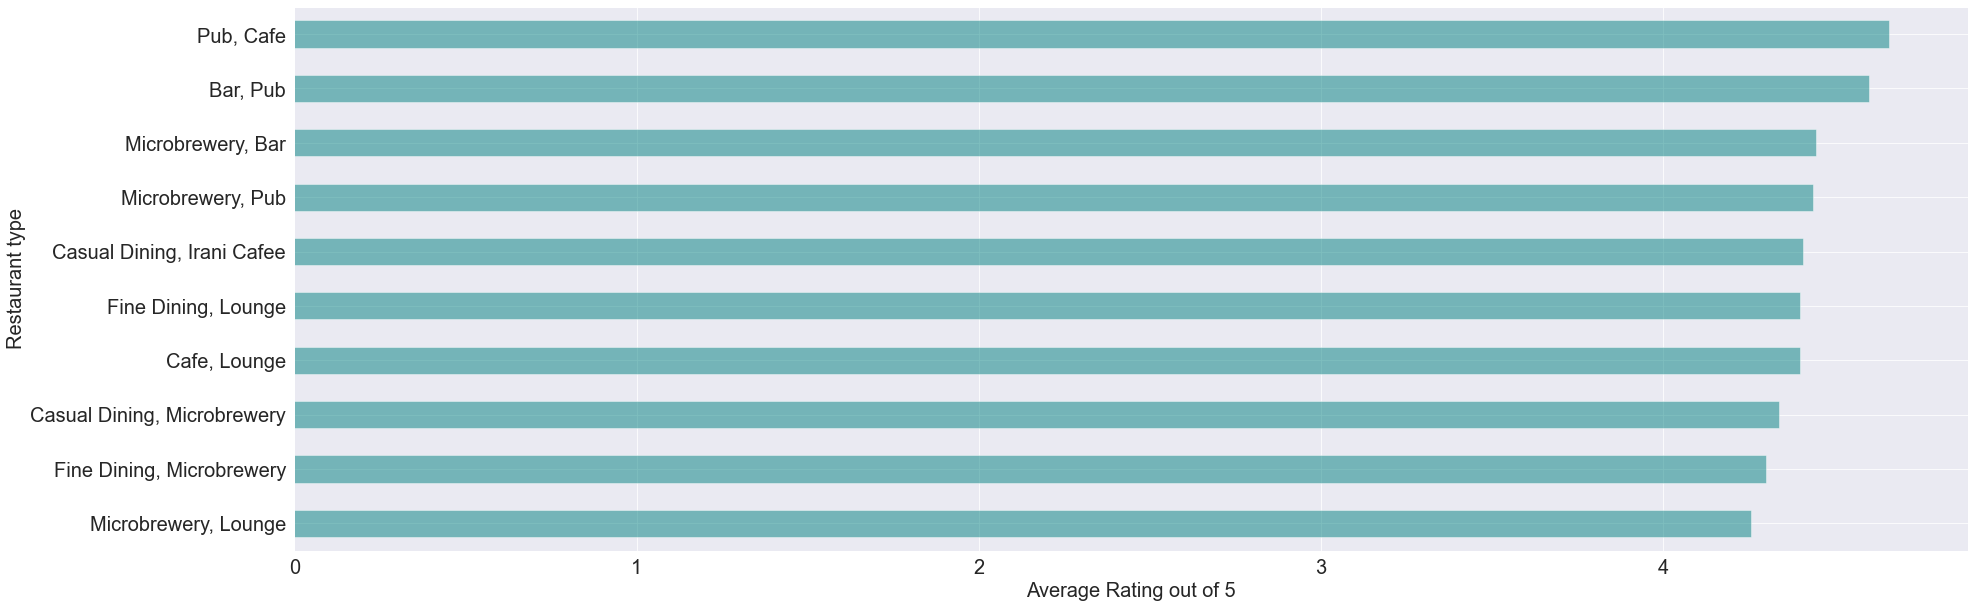

In [593]:
i=df.groupby('Rest_Type')['Ratings'].mean().sort_values(ascending=False)[0:10][::-1]
i.plot(kind='barh',alpha=0.5,figsize=(30,10),color='teal')
plt.ylabel('Restaurant type',size=20)
plt.xlabel('Average Rating out of 5',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### Average rating of restaurants that take online orders

In [594]:
grp1=df.groupby('Takes online orders?')['Ratings'].mean().reset_index()

In [595]:
print(grp1)

  Takes online orders?   Ratings
0                   No  2.487051
1                  Yes  3.333349


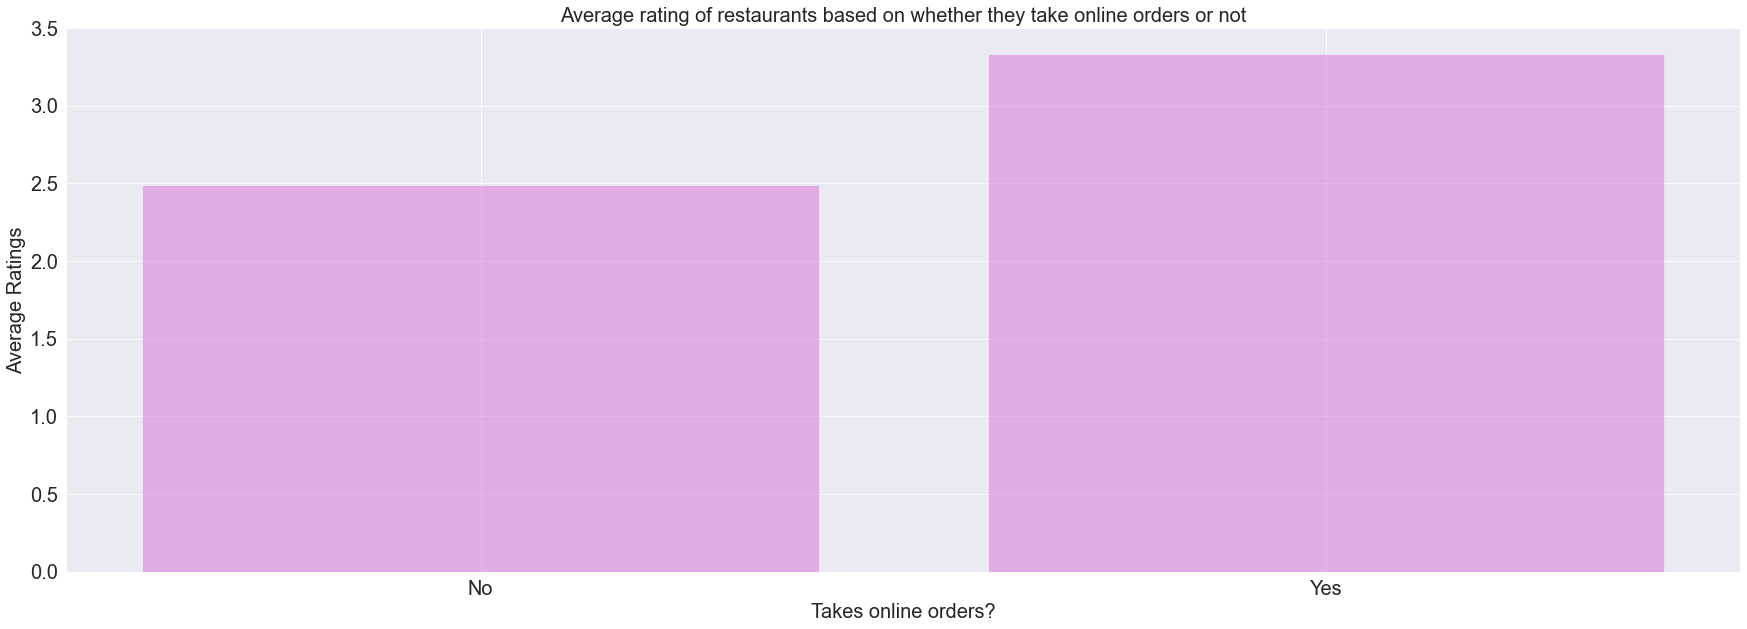

In [596]:
plt.figure(figsize=(30,10))
plt.bar(grp1['Takes online orders?'],grp1['Ratings'],alpha=0.5,color='orchid')
plt.xlabel('Takes online orders?',size=20)
plt.ylabel('Average Ratings',size=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Average rating of restaurants based on whether they take online orders or not',size=20)
plt.show()

#### Top 10 rated restaurants

In [597]:
grp2=df.groupby('Name')['Ratings'].mean().reset_index().sort_values(by='Ratings',ascending=False)[0:10]
print(grp2)

                                Name   Ratings
6455                Sant Spa Cuisine  4.900000
1257     Byg Brewski Brewing Company  4.900000
585   Asia Kitchen By Mainland China  4.900000
5845                    Punjab Grill  4.871429
850           Belgian Waffle Factory  4.844828
2557                        Flechazo  4.800000
5396                 OG Variar  Sons  4.800000
7924                The Pizza Bakery  4.800000
122          ABs  Absolute Barbecues  4.789474
1271                             CTR  4.750000


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


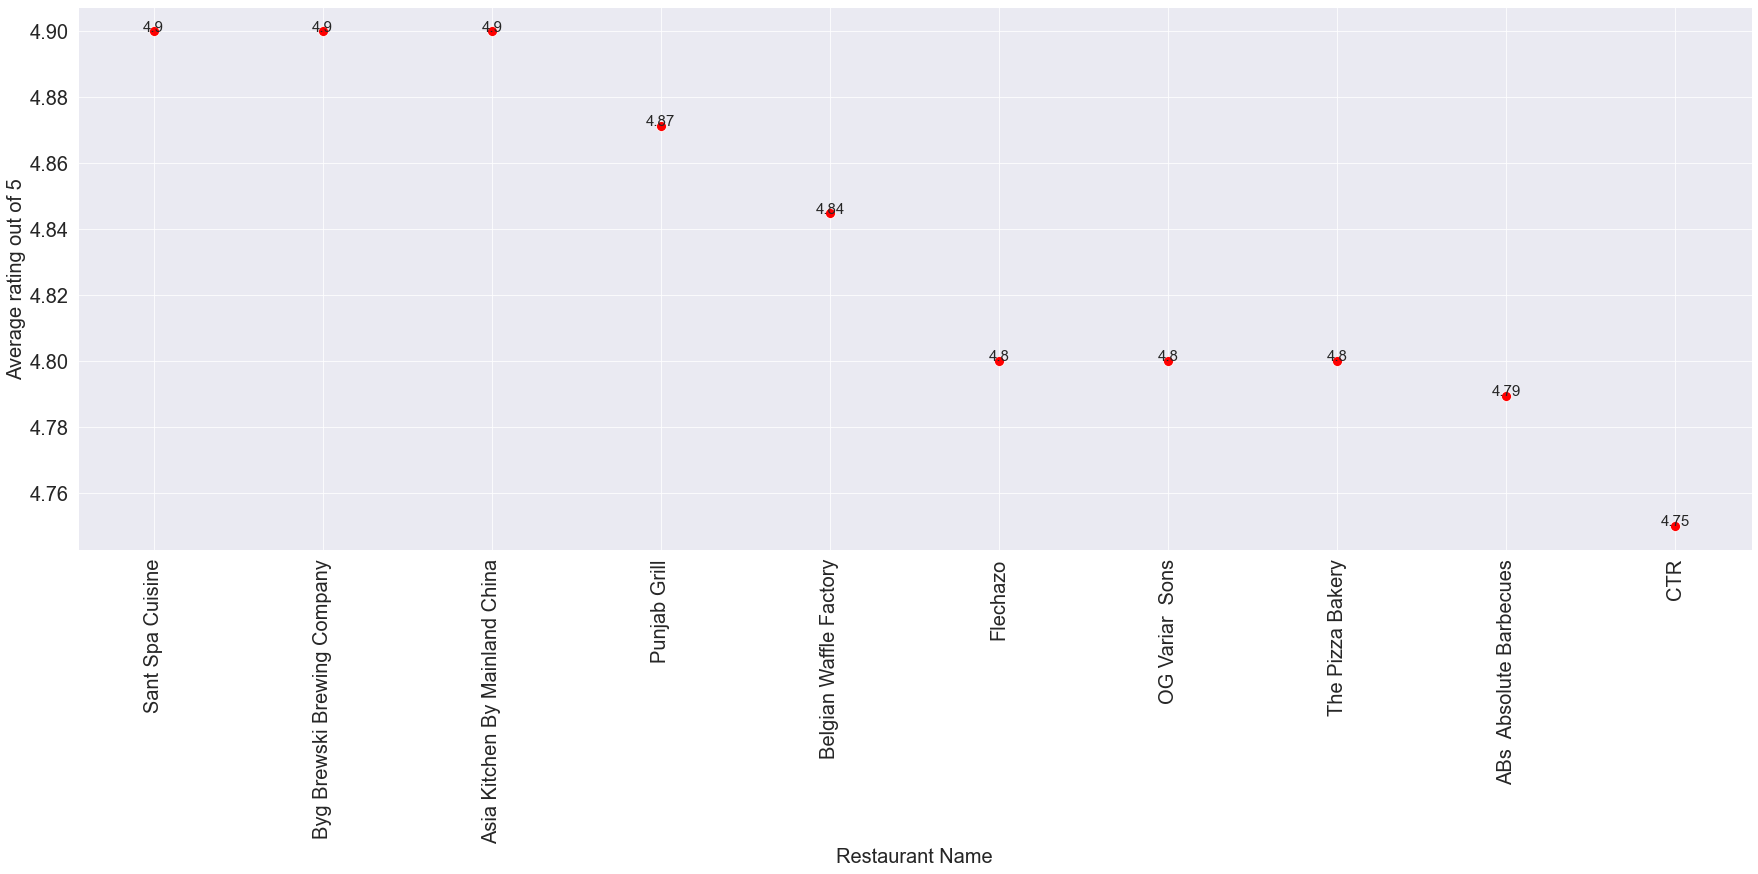

In [610]:
plt.figure(figsize=(30,10))
sns.scatterplot(grp2.Name,grp2.Ratings,s=100,color='red')
for i,e in enumerate(grp2.Ratings):
    plt.text(i,e,round(e,2),fontsize=15,horizontalalignment='center')

plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Average rating out of 5',size=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=90)
plt.show()